In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
import tensorflow as tf
import tensorflow.keras.layers as tfl

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def display_images(data, num_of_plots):
    
   
    images = glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraRGB/*.png')[:num_of_plots]
    masks = glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraSeg/*.png')[:num_of_plots]

    for i in range(len(images)):
        
        images[i] = cv2.imread(images[i])
        
        masks[i] = cv2.imread(masks[i],cv2.IMREAD_GRAYSCALE)

    fig, axes = plt.subplots(num_of_plots, 2)

    for i in range(len(images)):
        axes[i][0].imshow(images[i])
        axes[i][1].imshow(masks[i])

    # Show the plot
    plt.show()

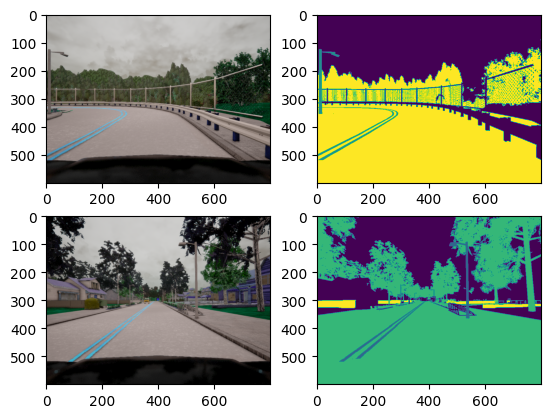

In [4]:
display_images('dataA', 2)

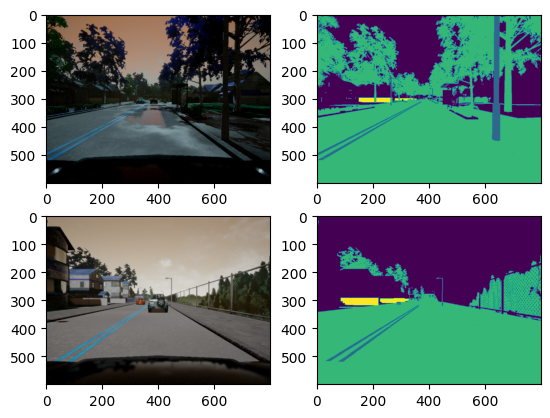

In [5]:
display_images('dataB', 2)

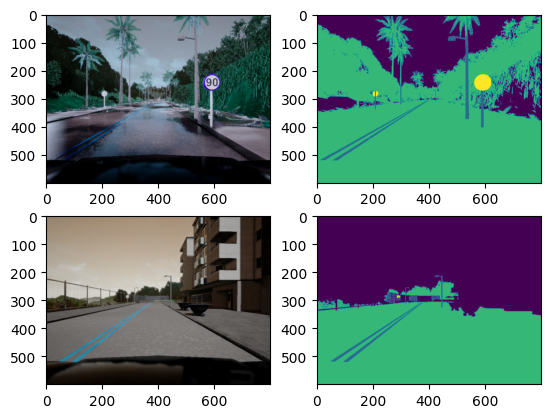

In [6]:
display_images('dataC', 2)

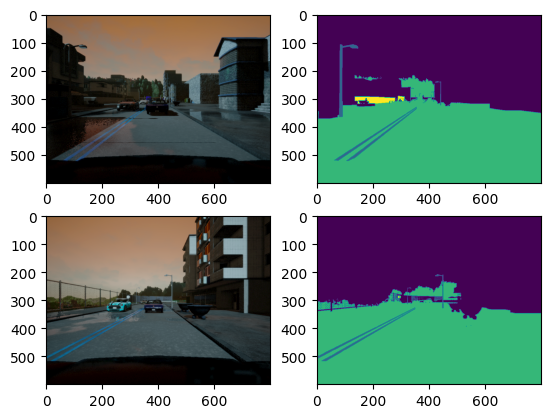

In [7]:
display_images('dataD', 2)

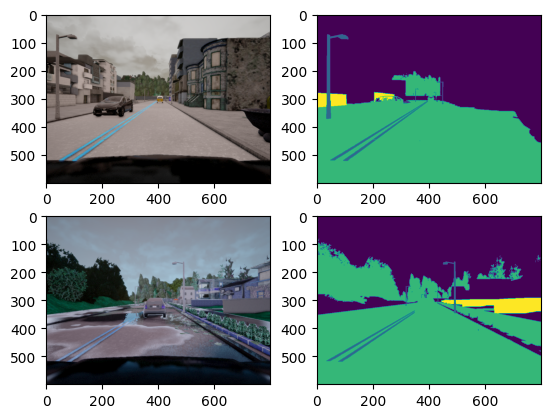

In [8]:
display_images('dataE', 2)

In [9]:
images_list = []
masks_list = []

def store_imgs_masks(data):
    images_list.append(glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraRGB/*.png'))
    masks_list.append(glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraSeg/*.png'))

In [10]:
store_imgs_masks('dataA')
store_imgs_masks('dataB')
store_imgs_masks('dataC')
store_imgs_masks('dataD')
store_imgs_masks('dataE')

In [11]:
print(images_list[0][:5])
print("------------------------------------------------------------")
print(masks_list[0][:5])

['/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F6-50.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F2-90.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_161.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_090.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_040.png']
------------------------------------------------------------
['/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F6-50.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F2-90.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_161.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_090.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_040.png']


In [12]:
print(images_list[0][:1], '\n')
print(images_list[1][:1], '\n')
print(images_list[2][:1], '\n')
print(images_list[3][:1], '\n')
print(images_list[4][:1], '\n')

['/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F6-50.png'] 

['/kaggle/input/lyft-udacity-challenge/dataB/dataB/CameraRGB/06_00_062.png'] 

['/kaggle/input/lyft-udacity-challenge/dataC/dataC/CameraRGB/F69-95.png'] 

['/kaggle/input/lyft-udacity-challenge/dataD/dataD/CameraRGB/05_00_247.png'] 

['/kaggle/input/lyft-udacity-challenge/dataE/dataE/CameraRGB/F67-59.png'] 



In [13]:
print(masks_list[0][:1], '\n')
print(masks_list[1][:1], '\n')
print(masks_list[2][:1], '\n')
print(masks_list[3][:1], '\n')
print(masks_list[4][:1], '\n')

['/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F6-50.png'] 

['/kaggle/input/lyft-udacity-challenge/dataB/dataB/CameraSeg/06_00_062.png'] 

['/kaggle/input/lyft-udacity-challenge/dataC/dataC/CameraSeg/F69-95.png'] 

['/kaggle/input/lyft-udacity-challenge/dataD/dataD/CameraSeg/05_00_247.png'] 

['/kaggle/input/lyft-udacity-challenge/dataE/dataE/CameraSeg/F67-59.png'] 



In [14]:
def get_one_list(list_of_lists):
    
    one_list = []

    for sublist in list_of_lists:
        one_list.extend(sublist)
    return one_list

In [15]:
images_list = get_one_list(images_list)
masks_list = get_one_list(masks_list)

In [16]:
images_list[60]

'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/03_00_101.png'

In [17]:
# let's Viewing a Sample of masks_list
masks_list[60]

'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/03_00_101.png'

In [18]:
image_list_tf = tf.data.Dataset.list_files(images_list, shuffle=False)
mask_list_tf = tf.data.Dataset.list_files(masks_list, shuffle=False)

In [19]:
print(image_list_tf.take(3))
print(mask_list_tf.take(3))
print("------------------------------------------------------")
for path in zip(image_list_tf.take(3), mask_list_tf.take(3)):
    print('\n')
    print(path)

<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
------------------------------------------------------


(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_000.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_000.png'>)


(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_001.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_001.png'>)


(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_010.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_010.png'>)


In [20]:
print(len(image_list_tf))
print(len(mask_list_tf))

5000
5000


In [21]:
image_filenames = tf.constant(images_list)
masks_filenames = tf.constant(masks_list)


dataset = tf.data.Dataset.from_tensor_slices((image_filenames, masks_filenames))


for image, mask in dataset.take(1):
    print(image,"\n")
    print(mask)

tf.Tensor(b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F6-50.png', shape=(), dtype=string) 

tf.Tensor(b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F6-50.png', shape=(), dtype=string)


In [22]:
def process_path(image_path, mask_path):
    
    
    img = tf.io.read_file(image_path)
    
    img = tf.image.decode_png(img, channels=3)
    
    img = tf.image.convert_image_dtype(img, tf.float32)
    
    
    mask = tf.io.read_file(mask_path)
    
    mask = tf.image.decode_png(mask, channels=3)
    
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    
    return img, mask

In [23]:
def preprocess(image, mask):
    
   
    input_image = tf.image.resize(image, (192, 256), method='nearest')
    input_mask = tf.image.resize(mask, (192, 256), method='nearest')

    return input_image, input_mask

In [24]:
image_ds = dataset.map(process_path)
processed_image_ds = image_ds.map(preprocess)

In [25]:
processed_image_ds.take(3)

<_TakeDataset element_spec=(TensorSpec(shape=(192, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(192, 256, 1), dtype=tf.uint8, name=None))>

In [26]:
uniques = set()

for img, mask in image_ds.take(5000):
    uniques.update(np.unique(mask.numpy()))
    
print(uniques)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [27]:
def conv_block_3(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    
    
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(inputs)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    
    if dropout_prob > 0:
        layer = tfl.Dropout(dropout_prob)(layer)
     
    
    if max_pooling:
        next_layer = tfl.MaxPooling2D(pool_size=(2,2))(layer)
        
    else:
        next_layer = layer
        
    skip_connection = layer
    
    return next_layer, skip_connection

In [28]:
def upsampling_block_3(expansive_input, contractive_input, n_filters=32):
    
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    
    
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(merge)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
  
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    return layer

In [29]:
def unet_model_3(input_size=(96,128,3), n_filters=32, n_classes = 13):
    
    inputs = tfl.Input(input_size)
    
   
    cblock1 = conv_block_3(inputs, n_filters)
    cblock2 = conv_block_3(cblock1[0], n_filters * 2)
    cblock3 = conv_block_3(cblock2[0], n_filters * 4)
    cblock4 = conv_block_3(cblock3[0], n_filters * 8, dropout_prob=0.3)
    
    
    cblock5 = conv_block_3(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)
    
   
    ublock6 = upsampling_block_3(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block_3(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block_3(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block_3(ublock8, cblock1[1], n_filters)
    
   
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(ublock9)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    layer = tfl.Conv2D(n_classes, 1, padding='same')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    model = tf.keras.Model(inputs=inputs, outputs=layer)
    
    return model

In [30]:
img_height = 192
img_width = 256
num_channels = 3

unet3 = unet_model_3((img_height, img_width, num_channels))

In [31]:
unet3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
EPOCHS = 20
BUFFER_SIZE = 1000
BATCH_SIZE = 64

map_dataset = processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Splitting data to training set and val set
num_samples = map_dataset.reduce(0, lambda x, _: x + 1).numpy() 
train_dataset = map_dataset.take(int(0.8 * num_samples)) 
val_dataset = map_dataset.skip(int(0.8 * num_samples))   
print(processed_image_ds)

# ReduceLROnPlateau and EarlyStopping callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=1, min_lr=1e-6)
early_stop = tf.keras.callbacks.EarlyStopping(patience=2)

<_MapDataset element_spec=(TensorSpec(shape=(192, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(192, 256, 1), dtype=tf.uint8, name=None))>


In [33]:
model_history3 = unet3.fit(train_dataset,validation_data=val_dataset, epochs=EPOCHS, callbacks=[reduce_lr,early_stop])

Epoch 1/20


I0000 00:00:1729204242.441127     100 service.cc:145] XLA service 0x7d22882163b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729204242.441182     100 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729204242.441186     100 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
W0000 00:00:1729204243.641916     100 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
2024-10-17 22:31:07.430020: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,193,257]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,64,96,128]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}), window={size=3x3 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cud

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5998 - loss: 1.7771

W0000 00:00:1729204399.068446     102 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
W0000 00:00:1729204404.930566     102 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


63/63 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.6023 - loss: 1.7717 - val_accuracy: 0.3574 - val_loss: 5.5579 - learning_rate: 0.0010
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8976 - loss: 1.0281 - val_accuracy: 0.8006 - val_loss: 1.2793 - learning_rate: 0.0010
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9235 - loss: 0.8649 - val_accuracy: 0.8045 - val_loss: 1.2989 - learning_rate: 0.0010
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9357 - loss: 0.7531 - val_accuracy: 0.8701 - val_loss: 1.0903 - learning_rate: 0.0010
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9450 - loss: 0.6612 - val_accuracy: 0.8990 - val_loss: 0.8939 - learning_rate: 0.0010
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9505 - loss: 0.5892 - val_accuracy: 0.9385 - val_loss: 0.7185 - learning_rate: 0.0010
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9561 - loss: 0.5223 - val_accuracy: 0.9447 - v

In [34]:
history = model_history3.history

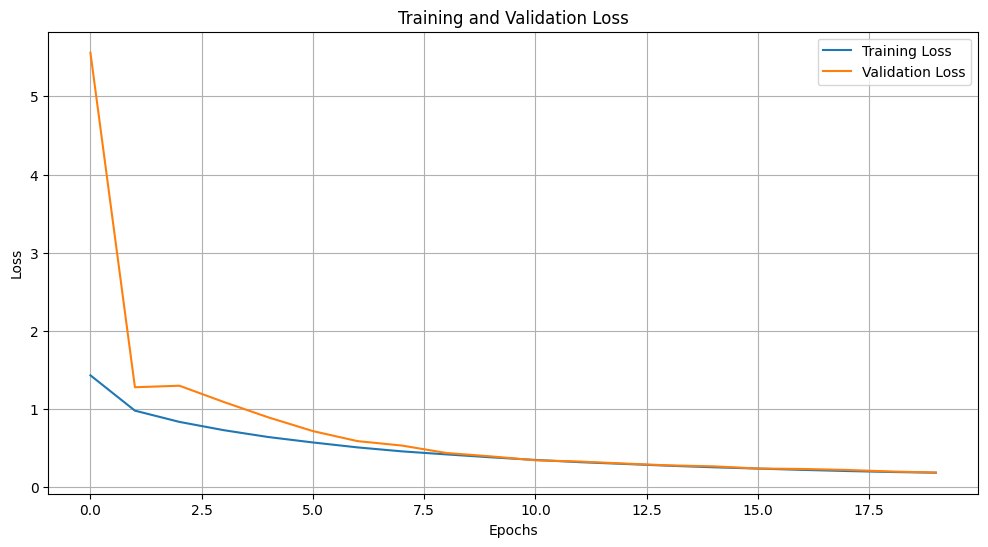

In [35]:
# Plot Training & Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

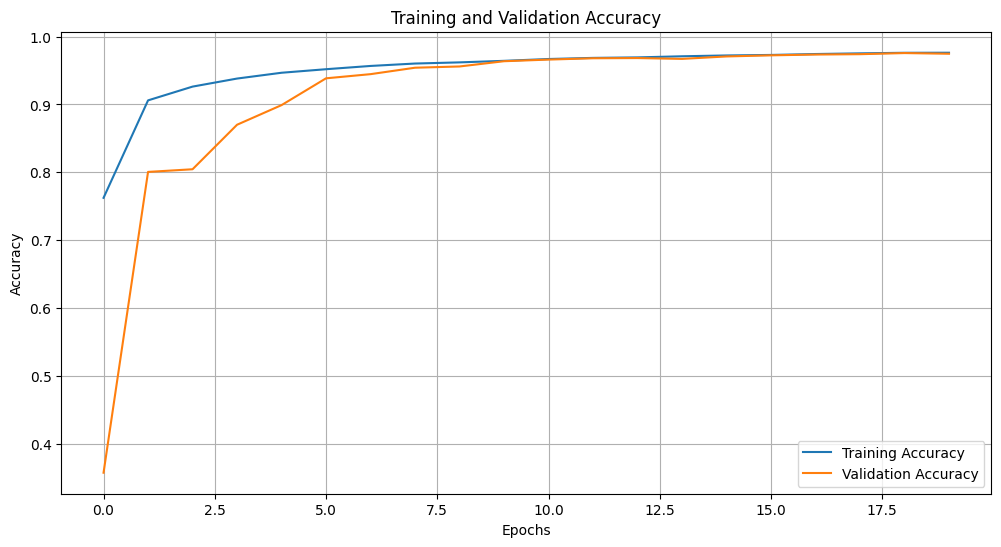

In [36]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
def display_predictions(model, dataset, num_samples=5, n_classes=13):
    
    for image, mask in dataset.take(num_samples):
        
        prediction = model.predict(image)
       
        predicted_mask = np.argmax(prediction, axis=-1)
        
       
        predicted_mask = predicted_mask[0]
        
        
        plt.figure(figsize=(15, 5))
        
        # Display the input image
        plt.subplot(1, 3, 1)
        plt.imshow(image[0])
        plt.title('Input Image')
        
        # Display the true mask
        plt.subplot(1, 3, 2)
        plt.imshow(tf.squeeze(mask[0]), vmin=0, vmax=n_classes - 1)
        plt.title('True Mask')
        
        # Display the predicted mask
        plt.subplot(1, 3, 3)
        plt.imshow(predicted_mask, vmin=0, vmax=n_classes - 1)
        plt.title('Predicted Mask')

        # Show the plots
        plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


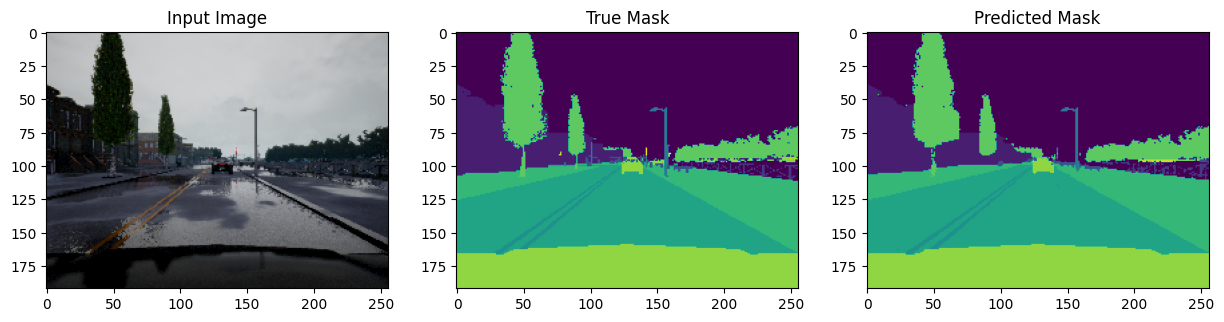

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


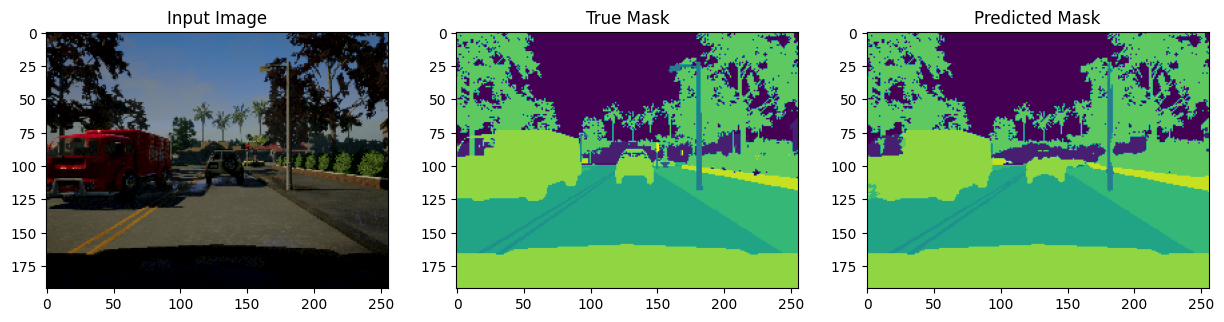

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


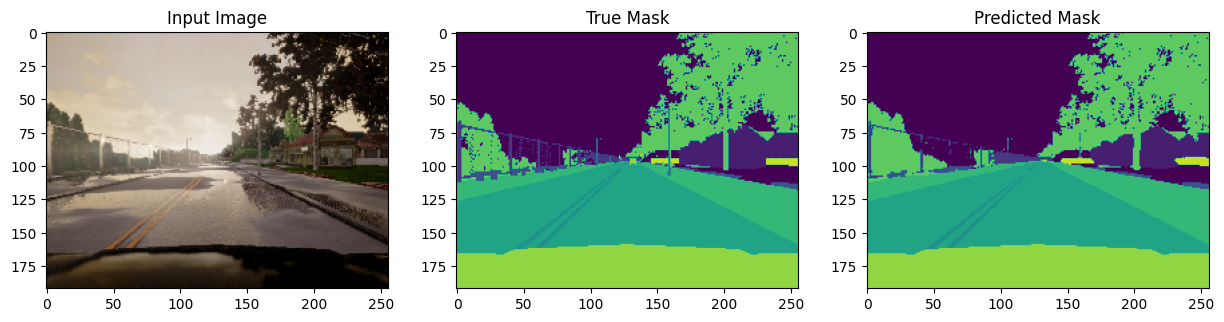

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


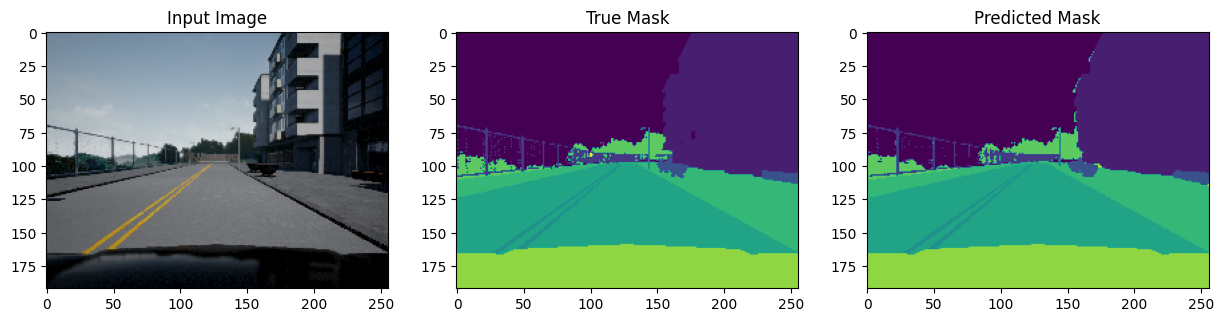

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


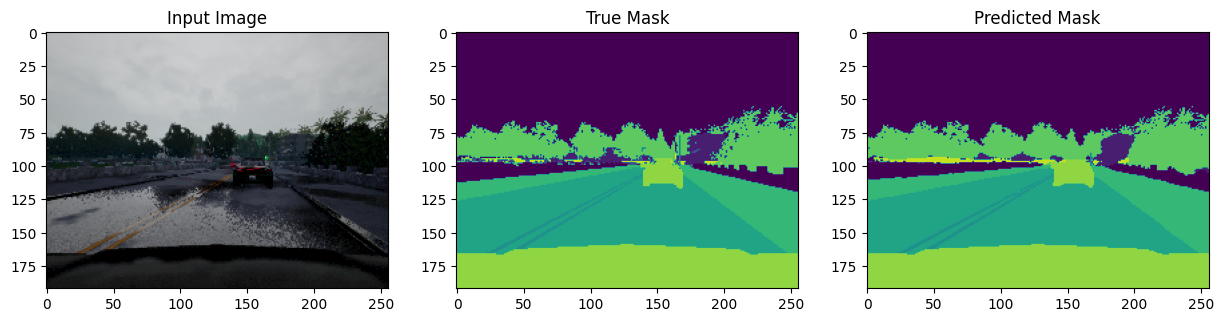

In [40]:
display_predictions(unet3, val_dataset, num_samples=5, n_classes=13)

# Saving the Model

In [41]:
tf.keras.models.save_model(unet3, '/kaggle/working/UNET_MODEL_3.h5')